# Heart Failure Prediction Dataset

People with cardiovascular disease or who are at high cardiovascular risk
(due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) 
need early detection and management wherein a machine learning model can be of great help.

Attribute Information:-
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

# 1. IMPORTING LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [170]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# 2. DATA UNDERSTANDING, SCANNING THE DATAFRAME, DIMENSSION, DATATYPE OF THE COLUMNS, DESCRIPTION

In [31]:
df= pd.read_csv(r"C:\Users\Gauri\Downloads\ML project\heart.csv")

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [34]:
df.shape

(918, 12)

In [35]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [36]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 3.CHECKING DUPLICATES, NULL VALUES

In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

EDA

<Axes: >

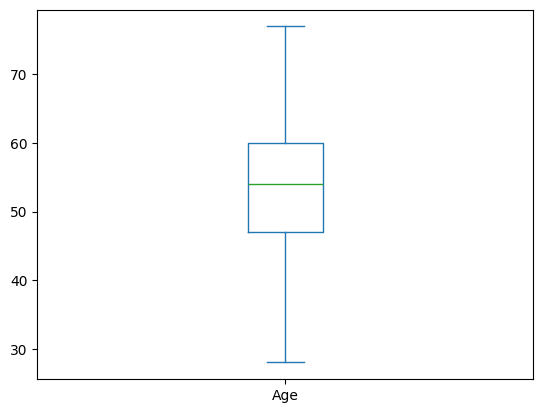

In [40]:
df['Age'].plot.box()

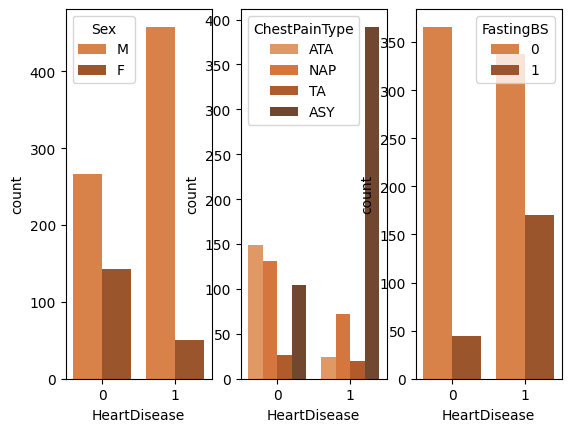

In [51]:
plt.figure.figsize=(125,20)

plt.subplot(1,3,1)
sns.countplot(x=df['HeartDisease'],hue=df['Sex'],data=df,palette='Oranges_d')

plt.subplot(1,3,2)
sns.countplot(x=df['HeartDisease'],hue=df['ChestPainType'],data=df,palette='Oranges_d')

plt.subplot(1,3,3)
sns.countplot(x=df['HeartDisease'],hue=df['FastingBS'],data=df,palette='Oranges_d')

plt.show()

# 4.  TXT INTO INT

In [53]:
df['Sex'].unique()
df['Sex'].value_counts(normalize=True)

Sex
M    0.78976
F    0.21024
Name: proportion, dtype: float64

In [55]:
df['Sex']=df['Sex'].replace(['M','F'],[1,0])
df['Sex'].unique()
df['Sex'].value_counts(normalize=True)

Sex
1    0.78976
0    0.21024
Name: proportion, dtype: float64

In [56]:
df['ST_Slope'].unique()
df['ST_Slope'].value_counts(normalize=True)

ST_Slope
Flat    0.501089
Up      0.430283
Down    0.068627
Name: proportion, dtype: float64

In [67]:
df['ST_Slope']=df['ST_Slope'].replace(['Flat','Up','Down'],[3,2,1])
df['ST_Slope'].unique()
df['ST_Slope'].value_counts(normalize=True)

ST_Slope
3    0.931373
2    0.068627
Name: proportion, dtype: float64

In [58]:
df['ChestPainType'].unique()
df['ChestPainType'].value_counts(normalize=True)

ChestPainType
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: proportion, dtype: float64

In [59]:
df['ChestPainType']=df['ChestPainType'].replace(['ASY','NAP','ATA','TA'],[1,2,3,4])
df['ChestPainType'].unique()
df['ChestPainType'].value_counts(normalize=True)

ChestPainType
1    0.540305
2    0.221133
3    0.188453
4    0.050109
Name: proportion, dtype: float64

In [60]:
df['RestingECG'].unique()
df['RestingECG'].value_counts(normalize=True)

RestingECG
Normal    0.601307
LVH       0.204793
ST        0.193900
Name: proportion, dtype: float64

In [61]:
df['RestingECG']=df['RestingECG'].replace(['Normal','LVH','ST'],[1,2,3])
df['RestingECG'].unique()
df['RestingECG'].value_counts(normalize=True)

RestingECG
1    0.601307
2    0.204793
3    0.193900
Name: proportion, dtype: float64

In [62]:
df['ExerciseAngina'].unique()
df['ExerciseAngina'].value_counts(normalize=True)

ExerciseAngina
N    0.595861
Y    0.404139
Name: proportion, dtype: float64

In [63]:
df['ExerciseAngina']=df['ExerciseAngina'].replace(['N','Y',],[1,2])
df['ExerciseAngina'].unique()
df['ExerciseAngina'].value_counts(normalize=True)

ExerciseAngina
1    0.595861
2    0.404139
Name: proportion, dtype: float64

# 5.FEATURE SELECTION

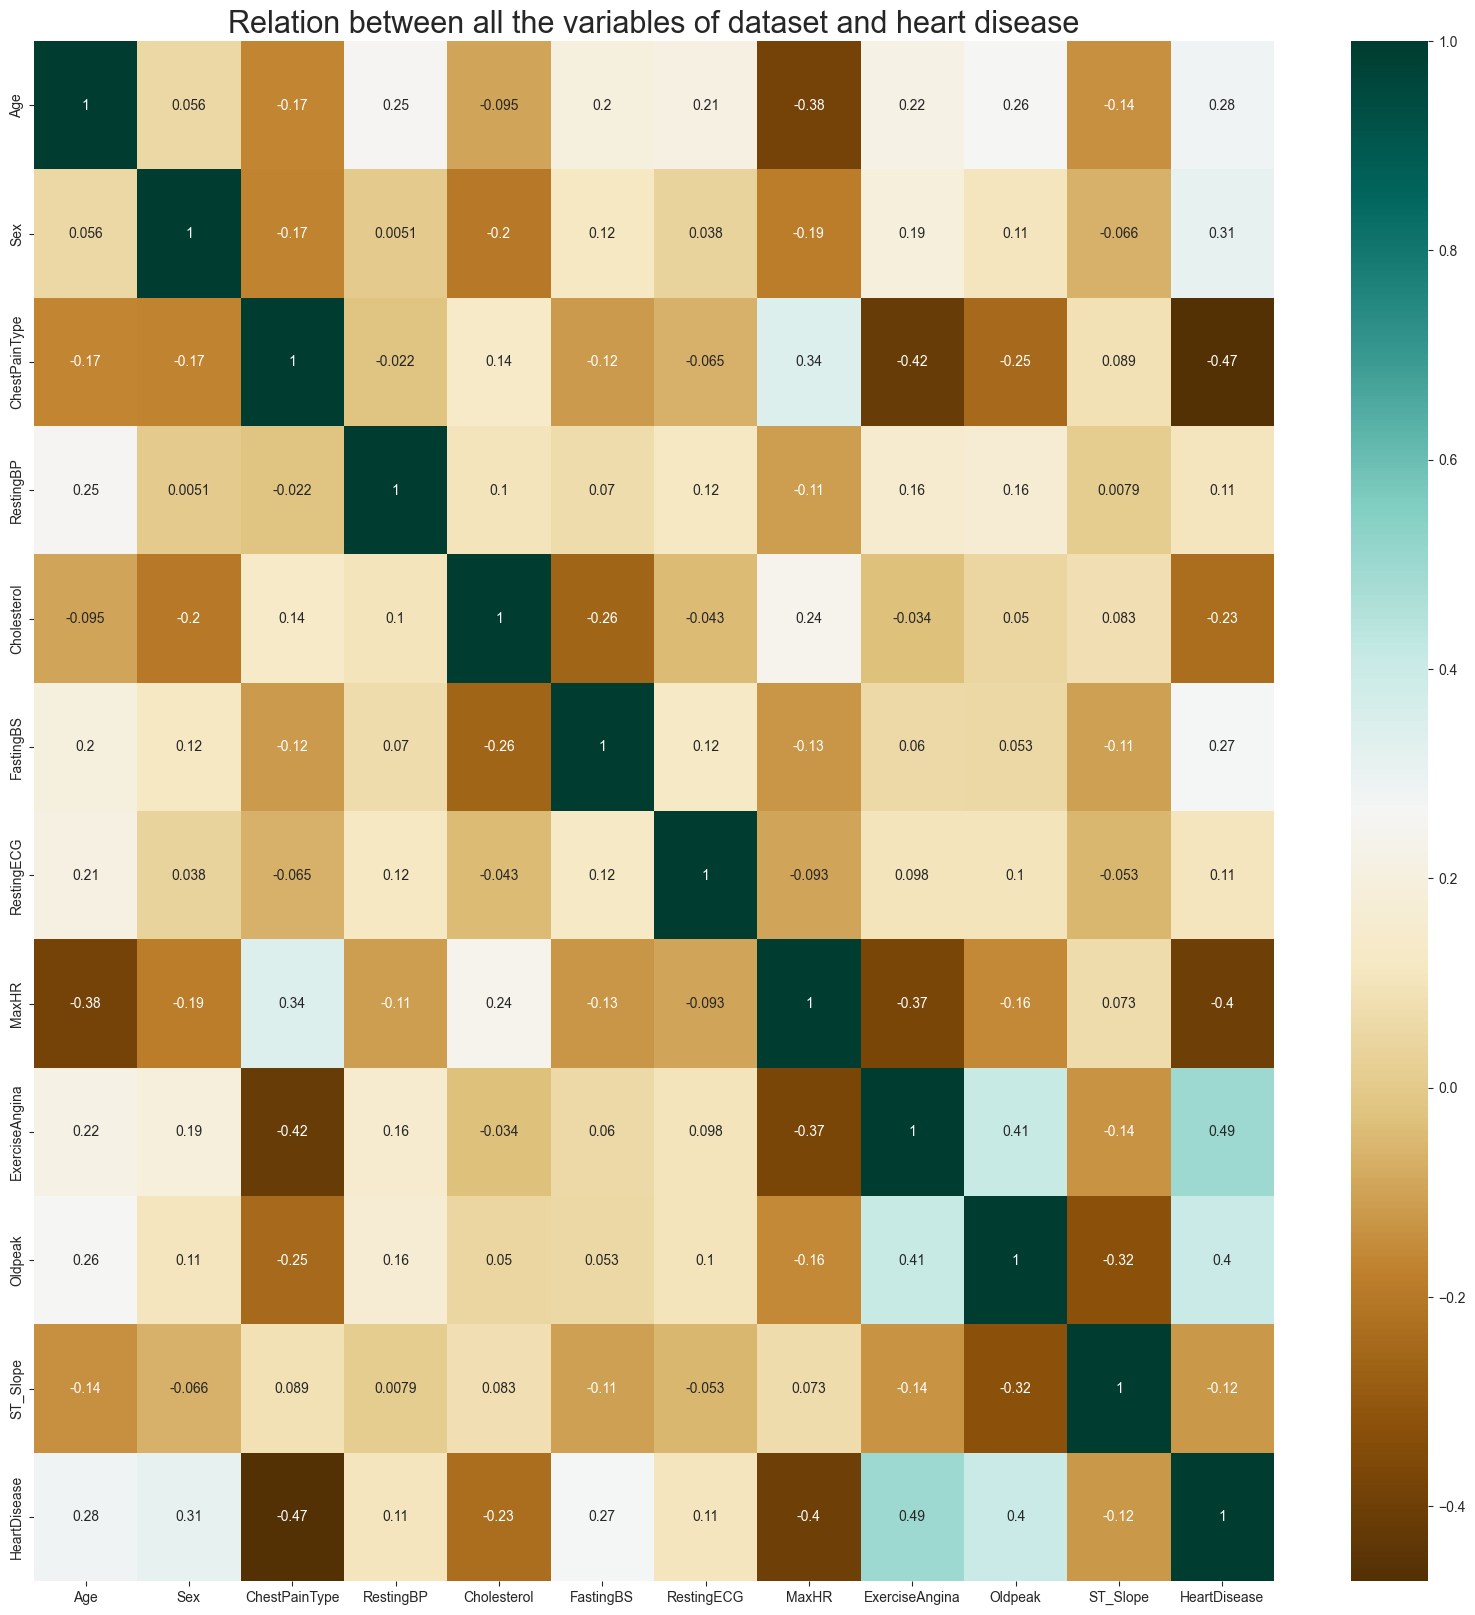

In [72]:
#get correlation of each features in dataset
corrmat= df.corr()
corr_features=corrmat.index
plt.figure(figsize=(20,20))
plt.title("Relation between all the variables of dataset and heart disease",fontsize=22)
#plot heat map
data=sns.heatmap(df[corr_features].corr(),annot=True,cmap="BrBG")


In [73]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.138397,0.282039
Sex,0.055750,1.000000,-0.168254,0.005133,-0.200092,0.120076,0.038320,-0.189186,0.190664,0.105734,-0.066036,0.305445
ChestPainType,-0.165896,-0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.088659,-0.471354
RestingBP,0.254399,0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,0.007912,0.107589
Cholesterol,-0.095282,-0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.083371,-0.232741
FastingBS,0.198039,0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.105102,0.267291
RestingECG,0.210498,0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.052507,0.107628
MaxHR,-0.382045,-0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.073316,-0.400421
ExerciseAngina,0.215793,0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.136439,0.494282
Oldpeak,0.258612,0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.322130,0.403951


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

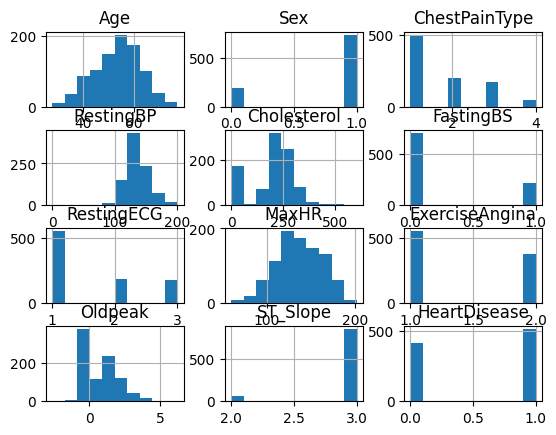

In [70]:
df.hist()

# 6. CHECKING FOR BALANCED DATASET

<Axes: xlabel='HeartDisease', ylabel='count'>

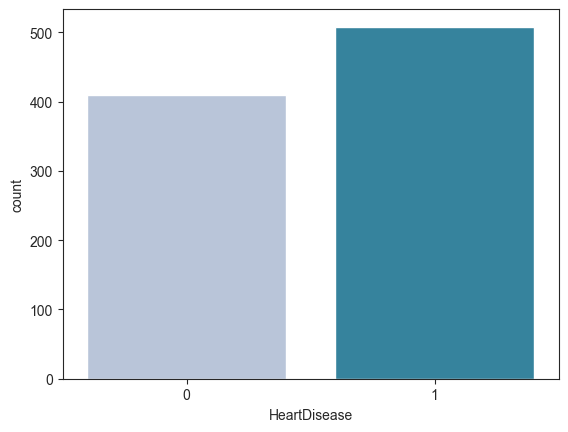

In [71]:
sns.set_style('ticks')
sns.countplot(x='HeartDisease',data=df,palette='PuBuGn')

Mean 53.510893246187365
Median 54.0
Mode 0    54
Name: Age, dtype: int64


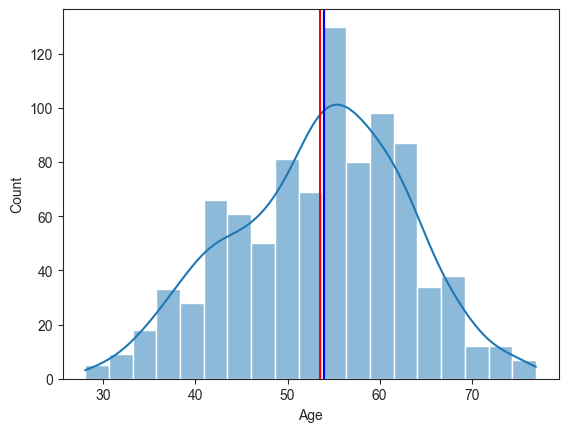

In [77]:
#value of mean, median and mode of age column
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'Green')
plt.axvline(df['Age'].mode()[0], color='Blue')
print('Mean', df['Age'].mean())
print('Median', df['Age'].median())
print('Mode', df['Age'].mode())

In [78]:
#values count of age column grouping by sex column
df.groupby('Sex')['Age'].value_counts()

Sex  Age
0    54     15
     51     11
     62     10
     43      9
     48      9
            ..
1    77      2
     28      1
     31      1
     33      1
     76      1
Name: count, Length: 91, dtype: int64

# 7. DATA PREPROCESSING -X AND Y TARGET , DATA ENCODING, SCALING, SPLITTING

In [80]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [81]:
le_model = LabelEncoder()
X['Sex'] = le_model.fit_transform(X['Sex'])
X['ChestPainType'] = le_model.fit_transform(X['ChestPainType'])
X['RestingECG'] = le_model.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le_model.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le_model.fit_transform(X['ST_Slope'])

In [82]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [144]:
accuracy_list=[]

# 8. MODEL BUILDING

## Logistic Regression 

In [152]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
print(lr.score(X_train, y_train))

0.8159806295399515


In [87]:
print(lr.score(X_test, y_test))

0.8478260869565217


In [88]:
y_pred = lr.predict(X_test)

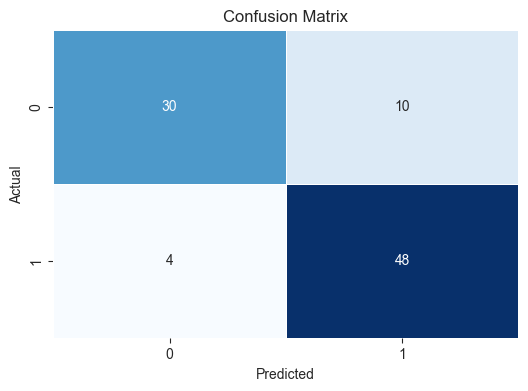

In [89]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
print(knn.score(X_train, y_train))

0.8801452784503632


In [92]:
print(knn.score(X_test, y_test))

0.8586956521739131


In [93]:
y_pred = knn.predict(X_test)

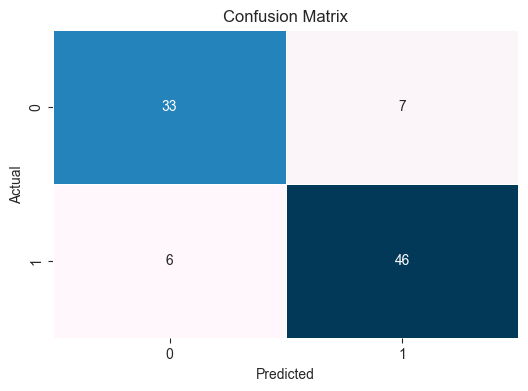

In [95]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

In [96]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
print(clf.score(X_train, y_train))

1.0


In [98]:
print(clf.score(X_test, y_test))

0.6956521739130435


In [99]:
y_pred = clf.predict(X_test)

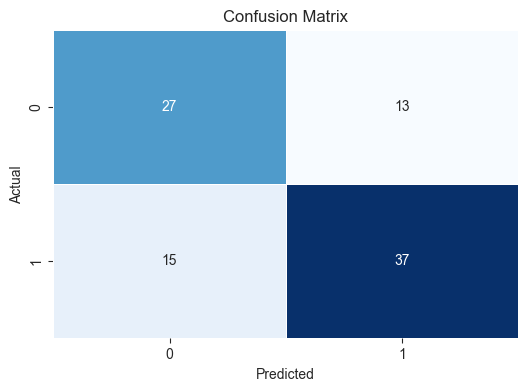

In [100]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RandomForestClassifier

In [132]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [133]:
RF.score(X_train, y_train)

1.0

In [134]:
y_pred = RF.predict(X_test)

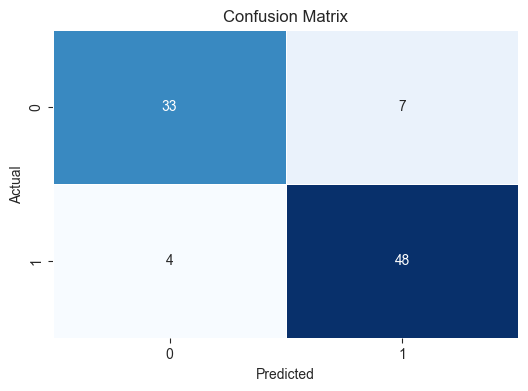

In [135]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bagging Classifier

In [121]:
base_classifier = DecisionTreeClassifier()

# Create a bagging classifier with decision trees
bagging= BaggingClassifier(base_classifier, n_estimators=10)

# Train the bagged classifier
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [122]:
bagging.score(X_train, y_train)

0.9878934624697336

In [123]:
bagging.score(X_test, y_test)

0.8043478260869565

In [124]:
y_pred = bagging.predict(X_test)

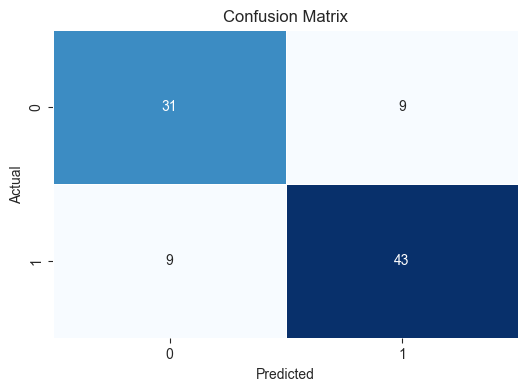

In [125]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AdaBoostClassifier

In [126]:
AB= AdaBoostClassifier(n_estimators=100)
AB.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [127]:
AB.score(X_train, y_train)

0.8716707021791767

In [128]:
AB.score(X_test, y_test)

0.8913043478260869

In [130]:
y_pred_ab =AB.predict(X_test)

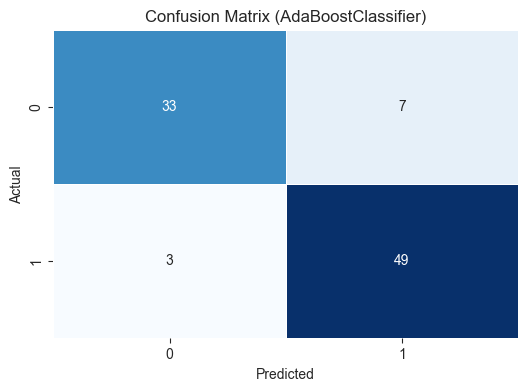

In [131]:
# Create a confusion matrix for AdaBoostClassifier
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (AdaBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC

In [115]:
svc=SVC(kernel='linear', random_state=42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [116]:
y_pred = svc.predict(X_test)

In [117]:
print(svc.score(X_train, y_train))

0.8184019370460048


In [118]:
print(svc.score(X_test, y_test))

0.8695652173913043


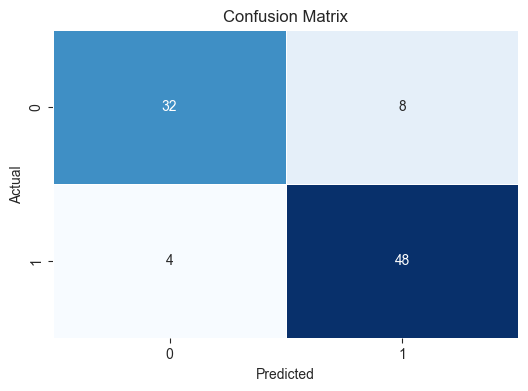

In [119]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9.MODEL EVALUATION

In [159]:
# Predictions
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
clf_pred = clf.predict(X_test)
RF_pred = RF.predict(X_test)
bagging_pred=bagging.predict(X_test)
AB_pred = AB.predict(X_test)
svc_pred = svc.predict(X_test)

# Evaluate models
models = {'Logistic Regression': lr_pred,'KNN': knn_pred,'clf': clf_pred,'Random Forest': RF_pred,'Bagging':bagging_pred, 'AdaBoost': AB_pred,  'SVC': svc_pred}
for model_name, pred in models.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        40
           1       0.83      0.92      0.87        52

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92

Confusion Matrix:
[[30 10]
 [ 4 48]]


Model: KNN
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.87      0.88      0.88        52

    accuracy                           0.86        92
   macro avg       0.86      0.85      0.86        92
weighted avg       0.86      0.86      0.86        92

Confusion Matrix:
[[33  7]
 [ 6 46]]


Model: clf
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       

# 10. Hyperparameter Tuning

In [171]:
# Define parameter grid
param_grid_RF = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search
grid_search_RF = GridSearchCV(RF, param_grid_RF, cv=5)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5)

# Fit grid search
grid_search_RF.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_RF.best_params_}")
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best parameters for KNN: {'n_neighbors': 7}
Best parameters for SVC: {'C': 1, 'kernel': 'linear'}


# 11.Model Selection

In [162]:
# Select the best model based on grid search
best_RF = grid_search_RF.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_svc = grid_search_svc.best_estimator_

# Evaluate best models
best_models = {'Random Forest': best_RF, 'KNN': best_knn, 'SVC': best_svc}
for model_name, model in best_models.items():
    pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")

Model: Random Forest
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.86      0.92      0.89        52

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.87        92
weighted avg       0.87      0.87      0.87        92

Confusion Matrix:
[[32  8]
 [ 4 48]]


Model: KNN
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        52

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix:
[[35  5]
 [ 6 46]]


Model: SVC
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
  

# 12.SUMMARY

In [169]:
summary= pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'SVC'],
    'Accuracy': [accuracy_score(y_test, RF_pred), accuracy_score(y_test, lr_pred),
                 accuracy_score(y_test, knn_pred), accuracy_score(y_test, svc_pred)],
    'Best Params': [grid_search_RF.best_params_, None, grid_search_knn.best_params_, grid_search_svc.best_params_]
})

print(summary)

                 Model  Accuracy                              Best Params
0        Random Forest  0.858696  {'max_depth': None, 'n_estimators': 50}
1  Logistic Regression  0.847826                                     None
2                  KNN  0.858696                       {'n_neighbors': 7}
3                  SVC  0.869565             {'C': 1, 'kernel': 'linear'}
